# US Baby Names 1880-2010

In [1]:
import pandas as pd

names1880 = pd.read_csv('/Users/stevenmacauda/Jupyter-Notebooks/names/yob1880.txt', names=['name', 'sex', 'births'])

In [2]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [3]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [6]:
# Create dataset containing all years
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '/Users/stevenmacauda/Jupyter-Notebooks/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single dataframe
names = pd.concat(pieces, ignore_index=True)

In [7]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692316,Zymaire,M,5,2010
1692317,Zyonne,M,5,2010
1692318,Zyquarius,M,5,2010
1692319,Zyran,M,5,2010


In [8]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [9]:
total_births.tail()

sex,F,M
year,,
2006,1900190,2054166
2007,1921491,2074249
2008,1889593,2038796
2009,1835649,1982082
2010,1775986,1917177


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year'>

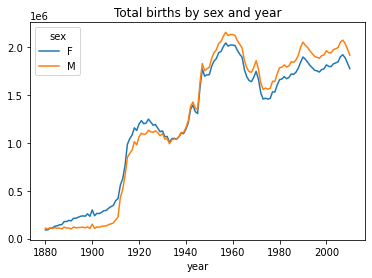

In [10]:
total_births.plot(title='Total births by sex and year')

In [11]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [12]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1692316,Zymaire,M,5,2010,0.000003
1692317,Zyonne,M,5,2010,0.000003
1692318,Zyquarius,M,5,2010,0.000003
1692319,Zyran,M,5,2010,0.000003


In [13]:
# Sanity check
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [14]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [15]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [16]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


### Analyzing Naming Trends

In [17]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [18]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [19]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6873 entries, Aaden to Zuri
dtypes: float64(6873)
memory usage: 6.9 MB


In [20]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

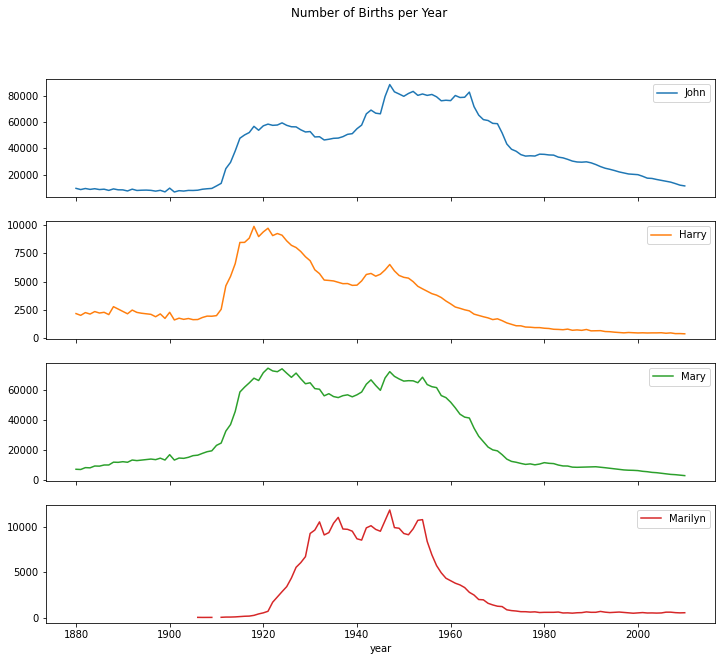

In [21]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of Births per Year")

#### Measuring the increase in naming diversity

In [22]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

<AxesSubplot:title={'center':'Sum of table1000.prop by Year and Sex'}, xlabel='year'>

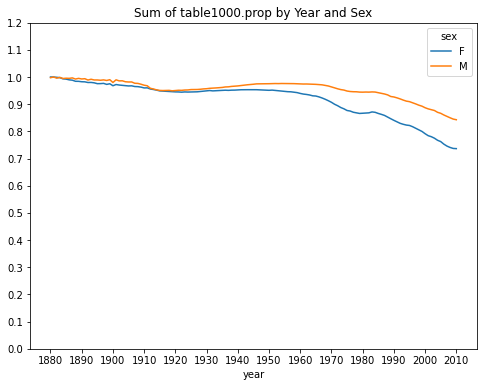

In [29]:
import numpy as np

table.plot(title="Sum of table1000.prop by Year and Sex", yticks=np.linspace(0, 1.2, 13), 
           xticks=range(1880, 2020, 10), figsize=(8, 6))

In [30]:
df = boys[boys.year == 2010]

In [31]:
df

,name,sex,births,year,prop
260876,Jacob,M,22139,2010,0.011548
260877,Ethan,M,18006,2010,0.009392
260878,Michael,M,17361,2010,0.009056
260879,Jayden,M,17189,2010,0.008966
260880,William,M,17058,2010,0.008897
...,...,...,...,...,...
261871,Bailey,M,196,2010,0.000102
261872,Destin,M,196,2010,0.000102
261873,Eliezer,M,196,2010,0.000102
261874,Enoch,M,196,2010,0.000102


In [32]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [33]:
prop_cumsum[:10]

260876    0.011548
260877    0.020940
260878    0.029995
260879    0.038961
260880    0.047858
260881    0.056599
260882    0.065184
260883    0.073451
260884    0.081558
260885    0.089643
Name: prop, dtype: float64

In [34]:
prop_cumsum.values.searchsorted(0.5)

116

In [35]:
df = boys[boys.year == 1900]

In [36]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [37]:
in1900.values.searchsorted(0.5) + 1

25

In [38]:
def get_quantile_group(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_group)
diversity = diversity.unstack('sex')

In [39]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of Popular Names in Top 50%'}, xlabel='year'>

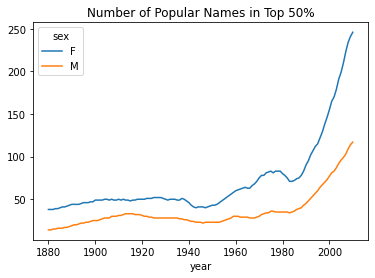

In [40]:
diversity.plot(title="Number of Popular Names in Top 50%")

#### The "last letter" revolution

In [41]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [42]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [43]:
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691278.0  677100.0    977.0    5212.0   28882.0
b                 NaN     694.0     455.0    411.0    3911.0   39294.0
c                 5.0      49.0     957.0    482.0   15457.0   23357.0
d              6751.0    3731.0    2645.0  22113.0  262120.0   44851.0
e            133601.0  435023.0  316878.0  28665.0  178760.0  130307.0

In [44]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022012.0
     2010    1775986.0
M    1910     194210.0
     1960    2132115.0
     2010    1917177.0
dtype: float64

In [46]:
letter_prop = subtable / subtable.sum()

In [47]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273386  0.341876  0.381253  0.005031  0.002445  0.015065
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020496
c            0.000013  0.000024  0.000539  0.002482  0.007250  0.012183
d            0.017026  0.001845  0.001489  0.113861  0.122939  0.023394
e            0.336947  0.215144  0.178424  0.147598  0.083842  0.067968
f                 NaN  0.000010  0.000055  0.000783  0.004330  0.001206
g            0.000144  0.000157  0.000377  0.002260  0.009489  0.001407
h            0.051530  0.036222  0.075989  0.045564  0.037913  0.051822
i            0.001526  0.039965  0.031697  0.000844  0.000610  0.022670
j                 NaN       NaN  0.000093       NaN       NaN  0.000772
k            0.000121  0.000155  0.000355  0.036579  0.049375  0.018532
l            0.043187  0.033868  0.026390  0.065022  0.104893  0.070457
m            0.001200  0.008613  0.002599  0.058045  0.033831  0.024706
n            0.079237  0.130671  0.140053  0.143386  0.152518  0.362410
o            0.001672  0.002439  0.001247  0.017064  0.012845  0.042563
p            0.000018  0.000023  0.000020  0.003172  0.005674  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013395  0.006765  0.018047  0.064471  0.031043  0.087393
s            0.039036  0.012765  0.013337  0.130797  0.102698  0.065158
t            0.027432  0.015198  0.007838  0.072885  0.065643  0.022861
u            0.000683  0.000575  0.000416  0.000124  0.000057  0.001228
v                 NaN  0.000060  0.000117  0.000113  0.000036  0.001451
w            0.000020  0.000031  0.001190  0.006323  0.007708  0.016183
x            0.000015  0.000037  0.000730  0.003965  0.001851  0.008599
y            0.110975  0.152555  0.116760  0.077344  0.160993  0.058201
z            0.002436  0.000658  0.000700  0.000170  0.000184  0.001829

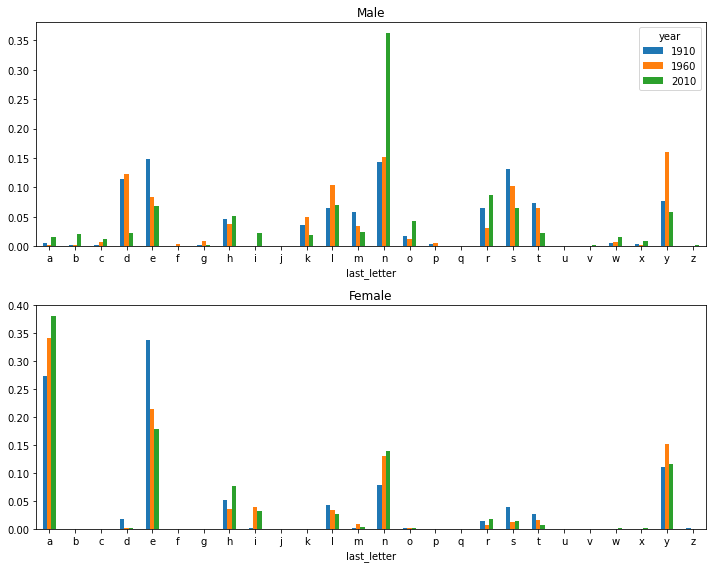

In [54]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)
fig.tight_layout()

In [55]:
letter_prop = table / table.sum()

In [56]:
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T

In [57]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083246,0.153219,0.077458
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


<AxesSubplot:xlabel='year'>

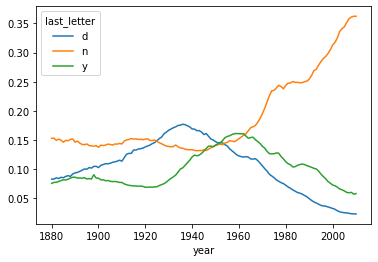

In [58]:
dny_ts.plot()

#### Boy names that became girl names (and vice versa)

In [59]:
all_names = pd.Series(top1000.name.unique())

In [60]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [61]:
lesley_like

632     Leslie
2293    Lesley
4265    Leslee
4733     Lesli
6109     Lesly
dtype: object

In [62]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [63]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35037
Lesli        929
Leslie    370579
Lesly      10072
Name: births, dtype: int64

In [64]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [65]:
table = table.div(table.sum(1), axis=0)

In [66]:
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<AxesSubplot:xlabel='year'>

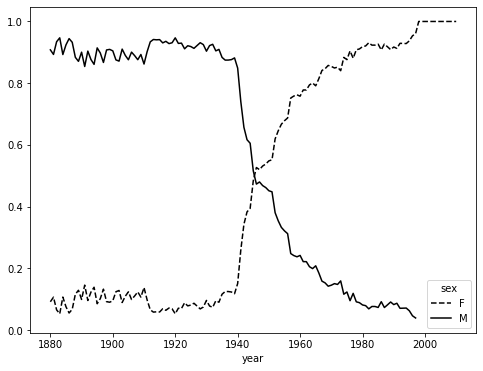

In [68]:
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(8, 6))